# Assignment 8: Phân vùng ảnh (Image Segmentation)

Tổng quan: Ở bài tập này chúng ta sẽ luyện tập thuật toán phân vùng ảnh sử dụng K-Means và Mean Shift. Các bài tập trong phần này yêu cầu bạn sử dụng các không gian đặc trưng khác nhau để biểu diễn các điểm ảnh, sau đó sử dụng K-Means và Mean Shift có sẵn trong thư viện sklearn để phân vùng ảnh

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

## Câu hỏi 1: Phân vùng ảnh xám

Ở phần này ta sẽ biểu diễn các mỗi điểm ảnh bằng một vecto 1 chiều (không gian đặc trưng 1D): giá trị độ sáng tại điểm ảnh tương ứng

(183, 275, 3)
(183, 275)


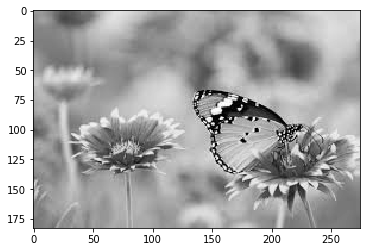

In [2]:
img = cv2.imread('img1.jpg')
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

Xây dựng ma trận biểu diễn dữ liệu:

In [3]:
X = img.reshape((-1, 1))
print(X.shape)

(50325, 1)


Lúc này mỗi hàng của ma trận X tương ứng với một vector biểu diễn một điểm ảnh trên ảnh ban đầu. Ta sẽ thử sử dụng thuật toán K-Means và MeanShift để phân vùng các điểm ảnh theo độ sáng của nó:

- KMeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[157.52583355]
 [201.71349382]
 [186.02510025]
 [ 15.25186104]
 [ 67.30377166]
 [124.12407108]
 [171.30948634]
 [ 98.81914894]
 [142.49493769]
 [221.23126484]]
(50325,)


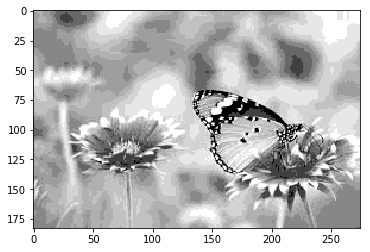

In [4]:
kmeans = KMeans(n_clusters=10, init='random').fit(X)
print(kmeans)
center = kmeans.cluster_centers_
label = kmeans.labels_

print(center)
print(label.shape)

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image, cmap='gray')
plt.show()

- MeanShift: Đối với MeanShift, ta cần một hàm để khởi tạo ngẫu nhiên các hạt seed:

In [5]:
def init_seed(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

MeanShift(bandwidth=1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1,
     seeds=array([[170],
       [209],
       [ 45],
       [142],
       [208],
       [ 50],
       [155],
       [160],
       [141],
       [196]], dtype=uint8))
[[159.49671053]
 [154.50535714]
 [169.53853383]
 [140.46871686]
 [142.48829787]
 [195.50550661]
 [208.52342488]
 [ 45.42592593]
 [ 50.53488372]]
(50325,)


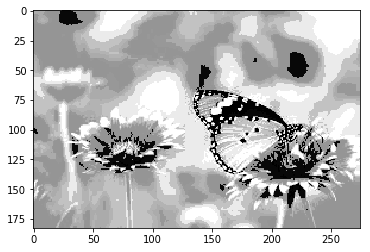

In [6]:
random_seeds = init_seed(X, 10)

ms = MeanShift(bandwidth=1, seeds=random_seeds)
print(ms)
ms.fit(X)
center = ms.cluster_centers_
label = ms.labels_

print(center)
print(label.shape)

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0, cmap='gray')
plt.show()

## Câu hỏi 2: Phân vùng ảnh màu (RGB)

### Câu hỏi 2.1: Sử dụng không gian đặc trưng 3D

Trong câu hỏi 2.1, mỗi điểm ảnh sẽ được biểu diễn bởi một vector 3 chiều (thay vì 1 chiều như câu hỏi 1) tương ứng là giá trị màu R, G, B tại điểm ảnh tương ứng. Ta sẽ sử dụng lại ảnh màu ở câu hỏi 1:

(183, 275, 3)


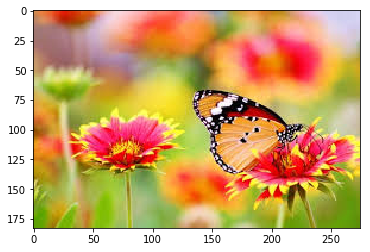

In [7]:
img = plt.imread('img1.jpg')
print(img.shape)
plt.imshow(img)
plt.show()

Hãy lập trình hàm get_3D_vector(img) sau đây, nhận vào một ma trận 3 chiều biễu diễn ảnh màu, trả về ma trận X có vai trò như câu hỏi 1, mỗi hàng của X biểu diễn vecto ứng với điểm ảnh tương ứng. Vì ta xét trong không gian đặc trưng 3D nên X cần có kích thước (50325, 3) (thay vì (50325, 1) như câu hỏi 1):

In [8]:
def get_3D_vector(img):
    X = None
    
    #### YOUR CODE HERE ####
    X = img.reshape((-1, 3))
    #### END YOUR CODE #####
    
    return X

In [9]:
X = get_3D_vector(img)
print(X.shape)

(50325, 3)


Bây giờ hay thử sử dụng các thuật toán KMeans và MeanShift như ở trên với dữ liệu ta vừa thu được:

- KMeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


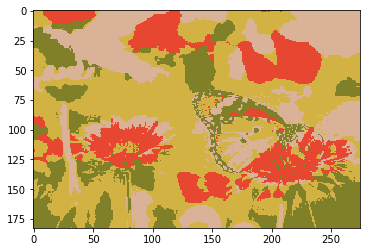

In [10]:
#### YOUR CODE HERE ####
kmeans = KMeans(n_clusters=4, init='random').fit(X)
print(kmeans)
center = kmeans.cluster_centers_
label = kmeans.labels_

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()
#### END YOUR CODE #####

- MeanShift

MeanShift(bandwidth=1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1,
     seeds=array([[197, 200,  59],
       [252, 178,  93],
       [224, 135,  55],
       [238, 170,  59],
       [160, 111,  45],
       [255, 169, 136],
       [177, 113,  41],
       [241, 152,  60],
       [165, 139, 168],
       [238, 123, 128]], dtype=uint8))
[[252. 178.  93.]
 [197. 200.  59.]
 [224. 135.  55.]
 [238. 170.  59.]
 [160. 111.  45.]
 [255. 169. 136.]
 [177. 113.  41.]
 [241. 152.  60.]
 [165. 139. 168.]
 [238. 123. 128.]]
(50325,)


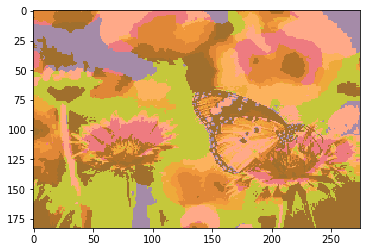

In [11]:
#### YOUR CODE HERE ####
random_seeds = init_seed(X, 10)

ms = MeanShift(bandwidth=1, seeds=random_seeds)
print(ms)
ms.fit(X)
center = ms.cluster_centers_
label = ms.labels_

print(center)
print(label.shape)

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()

#### END YOUR CODE #####

### Câu hỏi 2.2: Sử dụng không gian đặc trưng 5D
Trong câu hỏi 2.2, mỗi điểm ảnh sẽ được biểu diễn bởi một vector 5 chiều (thay vì 3 chiều như câu hỏi 2.1) tương ứng là giá trị màu R, G, B, tọa độ x, tọa độ y tại điểm ảnh tương ứng. Ta sẽ sử dụng lại ảnh màu ở câu hỏi 2.1:

In [12]:
img = plt.imread('img1.jpg')
print(img.shape)

(183, 275, 3)


Hãy lập trình hàm get_5D_vector(img) sau đây, nhận vào một ma trận 3 chiều biễu diễn ảnh màu, trả về ma trận X có vai trò như các câu hỏi trước, mỗi hàng của X biểu diễn vecto ứng với điểm ảnh tương ứng, mỗi vector này có dạng (R, G, B, x, y), trong đó (R, G, B) là cường độ màu tại điểm ảnh và (x, y) là tọa độ điểm ảnh đó. Vì ta xét trong không gian đặc trưng 5D nên X cần có kích thước (50325, 5) (thay vì (50325, 3) như câu hỏi 2.1):

In [13]:
def get_5D_vector(img):
    X = None
    
    #### YOUR CODE HERE ####
    X_pos = np.zeros((img.shape[0], img.shape[1], 2))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            X_pos[i][j][0] = i
            X_pos[i][j][1] = j
    X = img.reshape((-1, 3))
    X_pos = X_pos.reshape((-1, 2))

    X = np.concatenate((X, X_pos), axis=1)
    #### END YOUR CODE #####
    
    return X

In [14]:
X = get_5D_vector(img)
X.shape

(50325, 5)

Tiếp theo hãy áp dụng các giải thuật KMeans, MeanShift để phân vùng ảnh.

- KMeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


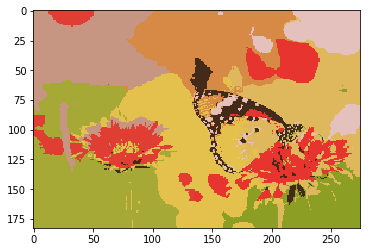

In [15]:
#### YOUR CODE HERE ####
kmeans = KMeans(n_clusters=10, init='random').fit(X)
print(kmeans)
center = kmeans.cluster_centers_
label = kmeans.labels_


segmented_image = center[label]
segmented_image = segmented_image[:, :3]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()
#### END YOUR CODE #####

- MeanShift

MeanShift(bandwidth=10, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1,
     seeds=array([[240.,  90.,   3., 149., 152.],
       [126., 143.,  88.,  46., 132.],
       [202., 150.,  64.,   4., 213.],
       [236., 189.,  57., 165., 173.],
       [247., 215., 220.,   4.,  68.],
       [172., 188., 100., 181., 187.],
       [252., 112.,  89.,   4., 104.],
       [158., 105.,  97.,  45.,  19.],
       [109., 155.,   5., 178., 214.],
       [161., 181.,  92., 162., 110.]]))
[[155.896      102.096      102.96        40.08        20.728     ]
 [104.95121951 155.74390244   6.25609756 179.03658537 218.2804878 ]
 [247.07246377 212.60869565 218.62318841   3.56521739  69.42028986]
 [236.86363636 187.52272727  50.02272727 163.61363636 170.56818182]
 [153.23684211 182.13157895  94.71052632 160.78947368 107.73684211]
 [253.11538462 111.23076923  91.73076923   3.46153846 109.23076923]
 [241.58823529  91.58823529   4.29411765 147.58823529 151.17647059]
 [126.88888889 141.33333333  

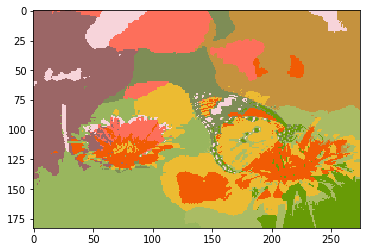

In [16]:
#### YOUR CODE HERE ####
random_seeds = init_seed(X, 10)

ms = MeanShift(bandwidth=10, seeds=random_seeds)
print(ms)
ms.fit(X)
center = ms.cluster_centers_
label = ms.labels_

print(center)
print(label.shape)

segmented_image = center[label]
segmented_image = segmented_image[:, :3]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()

#### END YOUR CODE #####